In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

from sklearn.datasets import load_diabetes

In [ ]:
# Load dataset
diabetes = load_diabetes()

# print(diabetes)

# Convert to DataFrame
data = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
# data
data.head(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041176,-0.096346
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062917,-0.038357
7,0.063504,0.050680,-0.001895,0.066629,0.090620,0.108914,0.022869,0.017703,-0.035816,0.003064
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014960,0.011349
9,-0.070900,-0.044642,0.039062,-0.033213,-0.012577,-0.034508,-0.024993,-0.002592,0.067737,-0.013504


In [ ]:
# Add target column
data["disease_progression"] = diabetes.target

data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease_progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


##1. Generate a scatter plot matrix (SPLOM) for a dataset with several numerical features (using a visualization library).

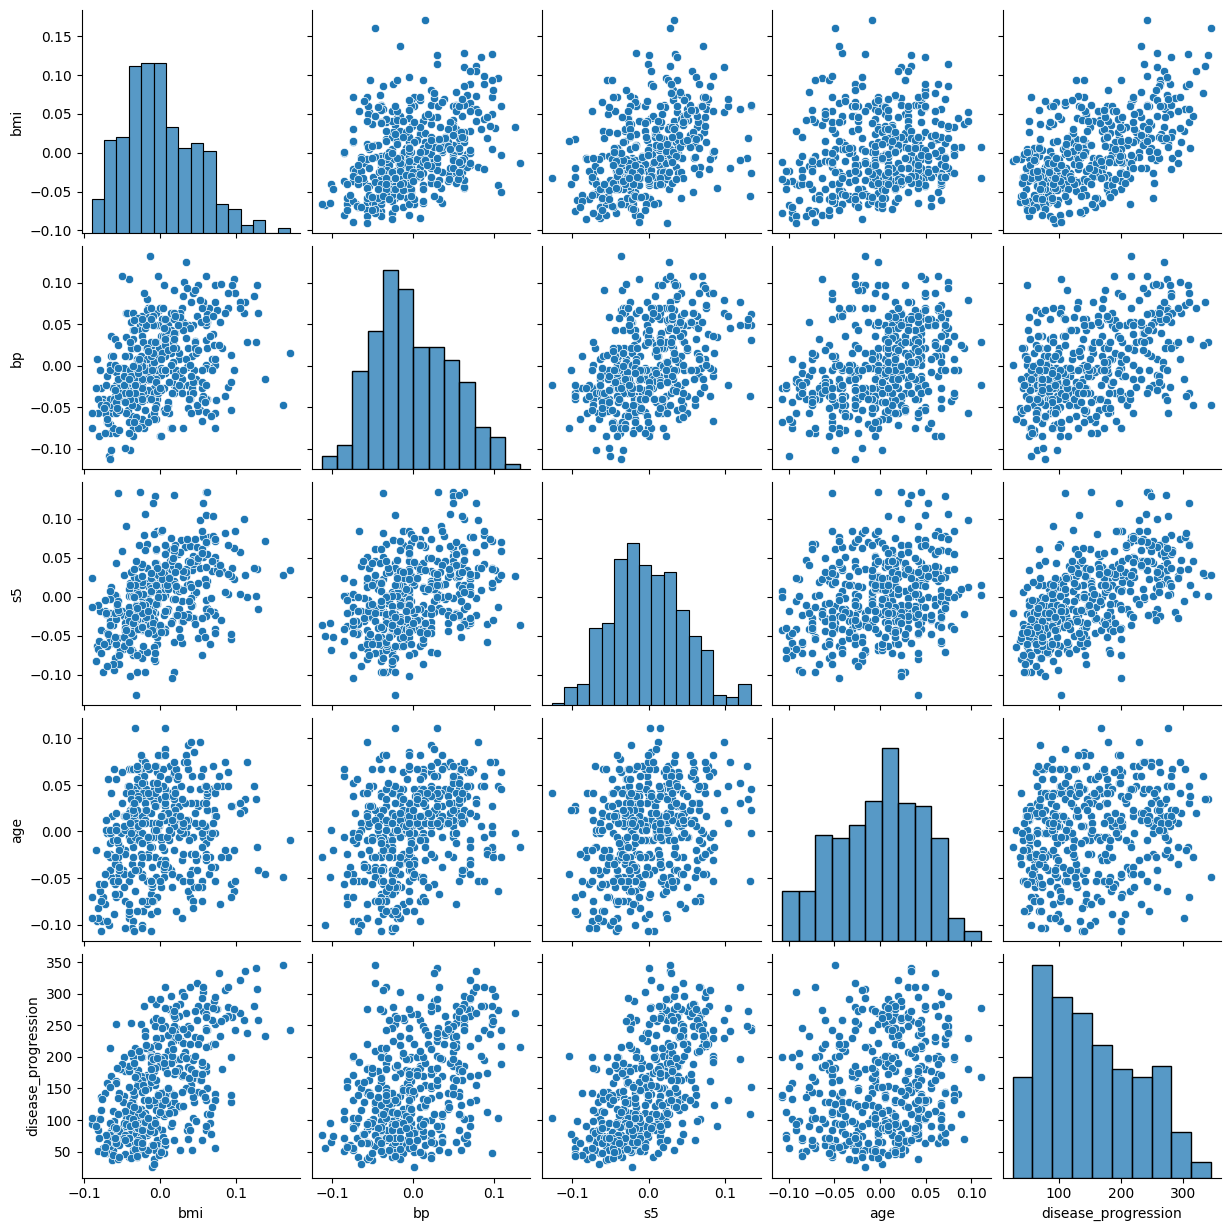

In [ ]:
selected_features = ["bmi", "bp", "s5", "age", "disease_progression"]

sns.pairplot(data[selected_features])
plt.show()

In [ ]:
selected_features = ["bmi", "bp", "s5", "age", "disease_progression"]

# Create interactive SPLOM
fig = px.scatter_matrix(
    data,
    dimensions=selected_features,
    title="Scatter Plot Matrix (SPLOM) - Diabetes Dataset"
)

fig.update_traces(diagonal_visible=True)
fig.show()

The above graphs shows:
- Creates pairwise scatter plots
- Diagonal shows feature distributions
- Off-diagonal shows relationships between variables

<!DOCTYPE html>
<html>
<head>
<style>

</style>
</head>
<body>

##2. Interpret the pairwise relationships shown in the SPLOM.

The SPLOM was generated using these attributes/variables/columns: ["bmi", "bp", "s5", "age", "disease_progression"]

Now we interpret each important relationship between different attributes properly.<br><br>

###a. BMI vs Disease Progression
Points form a noticeable upward trend, it is because:
  - BMI represents body fat.<br>
  - Higher BMI is medically linked to insulin resistance.<br>
  - Insulin resistance increases diabetes severity.<br>

  From the above reason, we can interpret that there's a Strong positive correlation between BMI and Disease.

  <br><br>

###b. BP (Blood Pressure) vs Disease Progression
Points form a noticeable Moderate upward pattern, it is because:
  - High blood pressure is commonly associated with metabolic disorders.
  - Diabetes patients often develop hypertension.
  - Increased BP reflects worsening health condition.

  From the above reason, we can interpret that there's a Moderate positive relationship between BP and Disease. Also, BP contributes to progression but less strongly than BMI

<br><br>

###c. s5 (Triglycerides) vs Disease Progression
Points form a noticeable Clear upward linear pattern, it is because:
  - s5 represents log of triglyceride levels.
  - High triglycerides indicate poor lipid metabolism.
  - Poor lipid control is strongly linked with Type-2 diabetes.

  From the above reason, we can interpret that there's strong positive correlation between s5 (Triglycerides) & Disease Progression. And it is  Possibily one of the most influential predictors.

  <br><br>

###d. Age vs Disease Progression
Points form a noticeable Scattered points, no strong trend, it is because:
  - Diabetes risk increases with age.
  - But progression severity may depend more on lifestyle factors.
  - Age alone does not determine severity.

  From the above reason, we can interpret that there's Weak relationship  between Age & Disease Progression. But, Age alone is not strong predictor, we have to consider different factors too, like BP, s5, etc...


  <br><br>

###e. BMI vs BP
Points form a noticeable Slight positive trend, it is because:
  - Obesity often leads to higher blood pressure.
  - Body weight affects cardiovascular system.

  From the above reason, we can interpret that there's Mild correlation between them. And it also indicates possible multicollinearity.

    NOTE: If two predictors are strongly correlated, regression models may face multicollinearity issues.

  <br><br>

###f. Age vs Disease Progression
Points form a noticeable Moderate upward pattern, it is because:
  - Higher BMI, means higher fat storage.
  - Fat metabolism affects triglyceride levels.

  From the above reason, we can interpret that there's a Biological linkage and features are related physiologically.


  <br><br>

  From all pairwise plots we conclude:

  1️. BMI and s5 show strongest relationships with target<br>
  2️. BP has moderate impact<br>
  3️. Age has weakest impact<br>
  4️. Some predictor variables are correlated (possible multicollinearity)<br>
  5️. No extreme outliers visible<br><br>


##Why SPLOM is Powerful Here?

SPLOM allows us to:

  - Visually detect correlation strength
  - Compare feature importance
  - Identify redundant features
  - Understand biological relationships
  - Spot unusual data points


</body>
</html>





#3. Why SPLOM Has Limitations?

This dataset has:

10 features → 100 plots
1 target → 121 plots

That means:
  - Too many tiny scatter plots
  - Hard to focus on important ones
  - Brain overload
  - Redundant mirror plots<br>

    As dimensions increase, usefulness decreases.




**Conclusion:** The SPLOM of the Diabetes dataset reveals that BMI and triglyceride levels (s5) are strongly associated with disease progression, while age shows weaker influence. The visualization also suggests moderate inter-feature correlations, indicating possible multicollinearity.

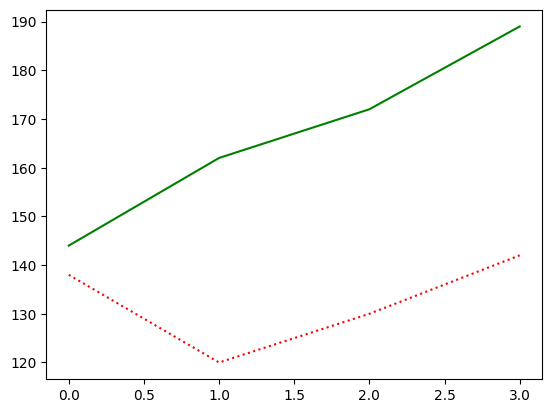

In [ ]:
ypoints = np.array([144, 162, 172, 189])
y1point = np.array([138, 120, 130, 142])

plt.plot(ypoints, color = 'g')
plt.plot(y1point, linestyle = 'dotted', color = 'r')
plt.show()